## Name: Thiago de Oliveira da Costa - StId: 2020005
### GitHub:  https://github.com/ThBrasilDaCosta/ML-Firewall-Inc-Traffic

### Project: Machine Learning Firewall Incoming Traffic.

##### Importing necessary labraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Loading CSV file:

In [2]:
firewall_traffic = pd.read_csv('log2.csv')

##### Data Understanding:

In [3]:
firewall_traffic.shape

(65532, 12)

In [4]:
firewall_traffic.head(10)

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
0,57222,53,54587,53,177,94,83,2,30,1,1,allow
1,56258,3389,56258,3389,4768,1600,3168,19,17,10,9,allow
2,6881,50321,43265,50321,238,118,120,2,1199,1,1,allow
3,50553,3389,50553,3389,3327,1438,1889,15,17,8,7,allow
4,50002,443,45848,443,25358,6778,18580,31,16,13,18,allow
5,51465,443,39975,443,3961,1595,2366,21,16,12,9,allow
6,60513,47094,45469,47094,320,140,180,6,7,3,3,allow
7,50049,443,21285,443,7912,3269,4643,23,96,12,11,allow
8,52244,58774,2211,58774,70,70,0,1,5,1,0,allow
9,50627,443,16215,443,8256,1674,6582,31,75,15,16,allow


In [5]:
firewall_traffic.dtypes

Source Port              int64
Destination Port         int64
NAT Source Port          int64
NAT Destination Port     int64
Bytes                    int64
Bytes Sent               int64
Bytes Received           int64
Packets                  int64
Elapsed Time (sec)       int64
pkts_sent                int64
pkts_received            int64
Action                  object
dtype: object

In [6]:
firewall_traffic.describe()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,65532.000000,65532.000000,65532.000000,65532.000000,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04,65532.000000,65532.000000,65532.000000
mean,49391.969343,10577.385812,19282.972761,2671.049930,9.712395e+04,2.238580e+04,7.473815e+04,1.028660e+02,65.833577,41.399530,61.466505
std,15255.712537,18466.027039,21970.689669,9739.162278,5.618439e+06,3.828139e+06,2.463208e+06,5.133002e+03,302.461762,3218.871288,2223.332271
min,0.000000,0.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,49183.000000,80.000000,0.000000,0.000000,6.600000e+01,6.600000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,53776.500000,445.000000,8820.500000,53.000000,1.680000e+02,9.000000e+01,7.900000e+01,2.000000e+00,15.000000,1.000000,1.000000
75%,58638.000000,15000.000000,38366.250000,443.000000,7.522500e+02,2.100000e+02,4.490000e+02,6.000000e+00,30.000000,3.000000,2.000000
max,65534.000000,65535.000000,65535.000000,65535.000000,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000


In [7]:
firewall_traffic.isna().sum()

Source Port             0
Destination Port        0
NAT Source Port         0
NAT Destination Port    0
Bytes                   0
Bytes Sent              0
Bytes Received          0
Packets                 0
Elapsed Time (sec)      0
pkts_sent               0
pkts_received           0
Action                  0
dtype: int64

In [8]:
firewall_traffic.loc[firewall_traffic.duplicated()]

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
268,21268,62609,0,0,146,146,0,1,0,1,0,deny
351,48706,23393,0,0,60,60,0,1,0,1,0,deny
593,65003,57470,0,0,78,78,0,1,0,1,0,deny
632,443,49988,0,0,82,82,0,1,0,1,0,deny
661,10669,49756,0,0,60,60,0,1,0,1,0,deny
...,...,...,...,...,...,...,...,...,...,...,...,...
65517,54874,445,0,0,70,70,0,1,0,1,0,drop
65519,49784,445,0,0,70,70,0,1,0,1,0,drop
65521,42995,26467,0,0,62,62,0,1,0,1,0,deny
65522,53314,64097,0,0,66,66,0,1,0,1,0,deny


In [9]:
firewall_traffic.columns

Index(['Source Port', 'Destination Port', 'NAT Source Port',
       'NAT Destination Port', 'Bytes', 'Bytes Sent', 'Bytes Received',
       'Packets', 'Elapsed Time (sec)', 'pkts_sent', 'pkts_received',
       'Action'],
      dtype='object')

##### Data cleaning:

In [10]:
firewall_traffic = firewall_traffic.loc[~firewall_traffic.duplicated(subset=['Source Port', 'Destination Port', 'NAT Source Port',
       'NAT Destination Port', 'Bytes', 'Bytes Sent', 'Bytes Received',
       'Packets', 'Elapsed Time (sec)', 'pkts_sent', 'pkts_received',
       'Action'])].reset_index(drop=True).copy()

In [11]:
firewall_traffic

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
0,57222,53,54587,53,177,94,83,2,30,1,1,allow
1,56258,3389,56258,3389,4768,1600,3168,19,17,10,9,allow
2,6881,50321,43265,50321,238,118,120,2,1199,1,1,allow
3,50553,3389,50553,3389,3327,1438,1889,15,17,8,7,allow
4,50002,443,45848,443,25358,6778,18580,31,16,13,18,allow
...,...,...,...,...,...,...,...,...,...,...,...,...
57165,51710,43069,65147,43069,70,70,0,2,8,2,0,allow
57166,63691,80,13237,80,314,192,122,6,15,4,2,allow
57167,50964,80,13485,80,4680740,67312,4613428,4675,77,985,3690,allow
57168,54871,445,0,0,70,70,0,1,0,1,0,drop


In [12]:
firewall_traffic.shape

(57170, 12)

In [13]:
firewall_traffic.describe()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,57170.000000,57170.000000,57170.000000,57170.000000,5.717000e+04,5.717000e+04,5.717000e+04,5.717000e+04,57170.000000,57170.000000,57170.000000
mean,50532.499738,8052.147035,22048.739549,3054.123491,1.113147e+05,2.564701e+04,8.566766e+04,1.177065e+02,75.116547,47.279255,70.427200
std,13880.680957,16513.145167,22141.986286,10363.545911,6.015189e+06,4.098545e+06,2.637029e+06,5.495436e+03,322.519323,3446.210063,2380.254144
min,0.000000,0.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,49450.000000,53.000000,0.000000,0.000000,7.000000e+01,7.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,54013.000000,443.000000,16362.500000,53.000000,1.930000e+02,9.400000e+01,9.000000e+01,2.000000e+00,26.000000,1.000000,1.000000
75%,58574.000000,445.000000,41883.750000,443.000000,1.139000e+03,5.080000e+02,6.690000e+02,1.000000e+01,31.000000,5.000000,4.000000
max,65534.000000,65535.000000,65535.000000,65535.000000,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000


##### MinMaxScaler

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(firewall_traffic[['Bytes', 'Bytes Sent', 'Bytes Received', 'Packets', 'Elapsed Time (sec)', 'pkts_sent', 'pkts_received']])
firewall_traffic_scaled = pd.DataFrame(scaled_features, columns=['Bytes', 'Bytes Sent', 'Bytes Received', 'Packets', 'Elapsed Time (sec)', 'pkts_sent', 'pkts_received'])

In [16]:
firewall_traffic_scaled

,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,9.217251e-08,3.584694e-08,2.586622e-07,9.651438e-07,0.002772,0.000000,0.000003
1,3.708959e-06,1.623655e-06,9.872794e-06,1.737259e-05,0.001571,0.000012,0.000028
2,1.402283e-07,6.115066e-08,3.739695e-07,9.651438e-07,0.110772,0.000000,0.000003
3,2.573740e-06,1.452855e-06,5.886903e-06,1.351201e-05,0.001571,0.000009,0.000021
4,1.992974e-05,7.082933e-06,5.790294e-05,2.895431e-05,0.001478,0.000016,0.000055
...,...,...,...,...,...,...,...
57165,7.877992e-09,1.054322e-08,0.000000e+00,9.651438e-07,0.000739,0.000001,0.000000
57166,2.001010e-07,1.391705e-07,3.802023e-07,4.825719e-06,0.001386,0.000004,0.000006
57167,3.687436e-03,7.090524e-05,1.437734e-02,4.511082e-03,0.007114,0.001316,0.011277
57168,7.877992e-09,1.054322e-08,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000


In [17]:
firewall_traffic_scaled.describe()

,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,5.717000e+04,5.717000e+04,5.717000e+04,5.717000e+04,57170.000000,57170.000000,57170.000000
mean,8.764634e-05,2.697693e-05,2.669758e-04,1.126385e-04,0.006940,0.000062,0.000215
std,4.738761e-03,4.321184e-03,8.218070e-03,5.303886e-03,0.029797,0.004610,0.007274
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,7.877992e-09,1.054322e-08,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,1.047773e-07,3.584694e-08,2.804771e-07,9.651438e-07,0.002402,0.000000,0.000003
75%,8.500354e-07,4.723361e-07,2.084880e-06,8.686294e-06,0.002864,0.000005,0.000012
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000


In [18]:
firewall_traffic[['Bytes', 'Bytes Sent', 'Bytes Received', 'Packets', 'Elapsed Time (sec)', 'pkts_sent', 'pkts_received']] = firewall_traffic_scaled

In [19]:
firewall_traffic

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
0,57222,53,54587,53,9.217251e-08,3.584694e-08,2.586622e-07,9.651438e-07,0.002772,0.000000,0.000003,allow
1,56258,3389,56258,3389,3.708959e-06,1.623655e-06,9.872794e-06,1.737259e-05,0.001571,0.000012,0.000028,allow
2,6881,50321,43265,50321,1.402283e-07,6.115066e-08,3.739695e-07,9.651438e-07,0.110772,0.000000,0.000003,allow
3,50553,3389,50553,3389,2.573740e-06,1.452855e-06,5.886903e-06,1.351201e-05,0.001571,0.000009,0.000021,allow
4,50002,443,45848,443,1.992974e-05,7.082933e-06,5.790294e-05,2.895431e-05,0.001478,0.000016,0.000055,allow
...,...,...,...,...,...,...,...,...,...,...,...,...
57165,51710,43069,65147,43069,7.877992e-09,1.054322e-08,0.000000e+00,9.651438e-07,0.000739,0.000001,0.000000,allow
57166,63691,80,13237,80,2.001010e-07,1.391705e-07,3.802023e-07,4.825719e-06,0.001386,0.000004,0.000006,allow
57167,50964,80,13485,80,3.687436e-03,7.090524e-05,1.437734e-02,4.511082e-03,0.007114,0.001316,0.011277,allow
57168,54871,445,0,0,7.877992e-09,1.054322e-08,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,drop


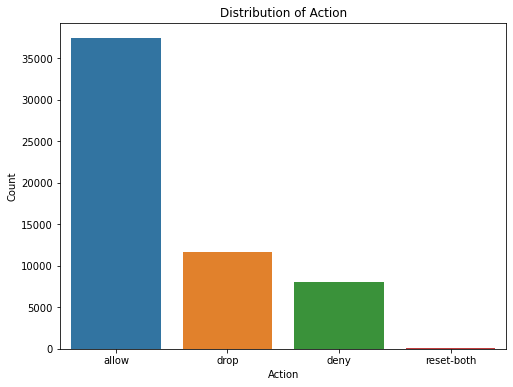

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(data=firewall_traffic, x='Action')
plt.title('Distribution of Action')
plt.xlabel('Action')
plt.ylabel('Count')
plt.show()

##### Applying encoding method:

In [ ]:
firewall_traffic['Action'].unique()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
firewall_traffic = firewall_traffic
firewall_traffic.Action = le.fit_transform(firewall_traffic.Action)
firewall_traffic

In [ ]:
firewall_traffic.dtypes

In [ ]:
firewall_traffic.head()

In [ ]:
firewall_traffic.tail(15)

In [ ]:
firewall_traffic.columns

In [ ]:
independent_features = ['Source Port', 'Destination Port', 'NAT Source Port',
       'NAT Destination Port', 'Bytes', 'Bytes Sent', 'Bytes Received',
       'Packets', 'Elapsed Time (sec)', 'pkts_sent', 'pkts_received']

dependent_features = ['Action']

X = firewall_traffic[independent_features]
y = firewall_traffic[dependent_features]

In [ ]:
print(X)

In [ ]:
print(y)

##### Train_Test_Split method.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=17, test_size = 0.2)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
y_train.shape

In [ ]:
y_test.shape

##### Decision Tree ML model:

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier()

In [ ]:
dtc.fit(X_train, y_train)

In [ ]:
y_pred = dtc.predict(X_test)

In [ ]:
dtc.score(X_test, y_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
print(confusion_matrix(y_test, y_pred))

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
dtc.feature_importances_

In [ ]:
X.columns

In [ ]:
features = pd.DataFrame(dtc.feature_importances_, index = X.columns)

In [ ]:
features

In [ ]:
print(dtc.predict([[57222, 53, 54587, 53, 177, 94, 83, 2, 30, 1, 1]]))

In [ ]:
print(dtc.predict([[54870, 445, 0, 0, 70, 70, 0, 1, 0, 1, 0]]))

In [ ]:
import random

In [ ]:
def random_data_generator(X):
    random_data = []
    for feature in X.columns:
        random_data.append(random.choice(X[feature]))
    return [random_data]

random_data = random_data_generator(X)

In [ ]:
print(random_data)

In [ ]:
print(dtc.predict(random_data))

##### Random Forest ML model:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train, y_train.values.ravel())

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
rf.score(X_test, y_test)

In [ ]:
features = pd.DataFrame(rf.feature_importances_, index = X.columns)

In [ ]:
features

In [ ]:
print(rf.predict([[57222, 53, 54587, 53, 177, 94, 83, 2, 30, 1, 1]]))

In [ ]:
print(rf.predict([[54870, 445, 0, 0, 70, 70, 0, 1, 0, 1, 0]]))

In [ ]:
def random_data_generator(X):
    random_data = []
    for feature in X.columns:
        random_data.append(random.choice(X[feature]))
    return [random_data]

random_data = random_data_generator(X)

In [ ]:
print(random_data)

In [ ]:
print(rf.predict(random_data))